# Reto Hey Banco

## Librerías

In [1]:
import pandas as pd
import numpy as np
import sklearn
import re
import emoji
import nltk
import plotly.graph_objects as go
import matplotlib.pyplot as plt


from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from nltk.corpus import stopwords
from nltk.util import ngrams
from collections import Counter
from nltk.sentiment.vader import SentimentIntensityAnalyzer


## df_traducido_emojis


In [2]:
# Leer el DataFrame
df = pd.read_csv('C:/Users/Ana Paola A.P/Downloads/Archivos python/df_traducido_emojis.csv', encoding='utf-8')

# Convertir la columna de fechas a tipo datetime
df['date'] = pd.to_datetime(df['date'])

# Definir el rango de fechas deseado (Se le pedirá al usuario que ingrese las fechas en la interfaz)
fecha_inicio = '2023-03-01'
fecha_fin = '2023-03-30'

# Acotar el DataFrame al rango de fechas ingresado por el usuario
df = df[(df['date'] >= fecha_inicio) & (df['date'] <= fecha_fin)]

# Mostrar el DataFrame resultante
print(df.head(10))


          date time                                   translated_tweet
184 2023-03-01  NaN  cheer up almost a year with the heycredit card...
185 2023-03-02  NaN  thank you as i remember i had already done thi...
186 2023-03-02  NaN                              much success heybanco
187 2023-03-02  NaN   highly recommended ok hand ps yotepresto and ...
188 2023-03-03  NaN  hello thank you very much for your response in...
189 2023-03-03  NaN  manifestosparkles i went today and left in lov...
190 2023-03-03  NaN  it was resolved with the app update thanks the...
191 2023-03-03  NaN  you are my bank and the truth is you are doing...
192 2023-03-03  NaN  definitivamentebackhand index pointing up medi...
193 2023-03-04  NaN  thanks for kidnapping the money in savings man...


In [3]:

# Descargar el lexicon VADER
nltk.download('vader_lexicon')

# Inicializar el analizador de sentimientos
sid = SentimentIntensityAnalyzer()

# Función para analizar el sentimiento de un comentario usando NLTK
def analyze_sentiment(comment):
    # Obtener el puntaje de sentimiento compuesto
    compound_score = sid.polarity_scores(comment)['compound']
    # Clasificar el sentimiento como positivo, negativo o neutral basado en el puntaje compuesto
    if compound_score > 0.05:
        sentiment = 'Positivo'
    elif compound_score < -0.05:
        sentiment = 'Negativo'
    else:
        sentiment = 'Neutral'
    return sentiment, compound_score
# Aplicar la función a la columna 'Emoji_Text' y agregar los resultados a una nueva columna 'Sentimiento'
df['Sentimiento'] = df['translated_tweet'].apply(analyze_sentiment)



[nltk_data] Downloading package vader_lexicon to C:\Users\Ana Paola
[nltk_data]     A.P\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


[nltk_data] Downloading package stopwords to C:\Users\Ana Paola
[nltk_data]     A.P\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


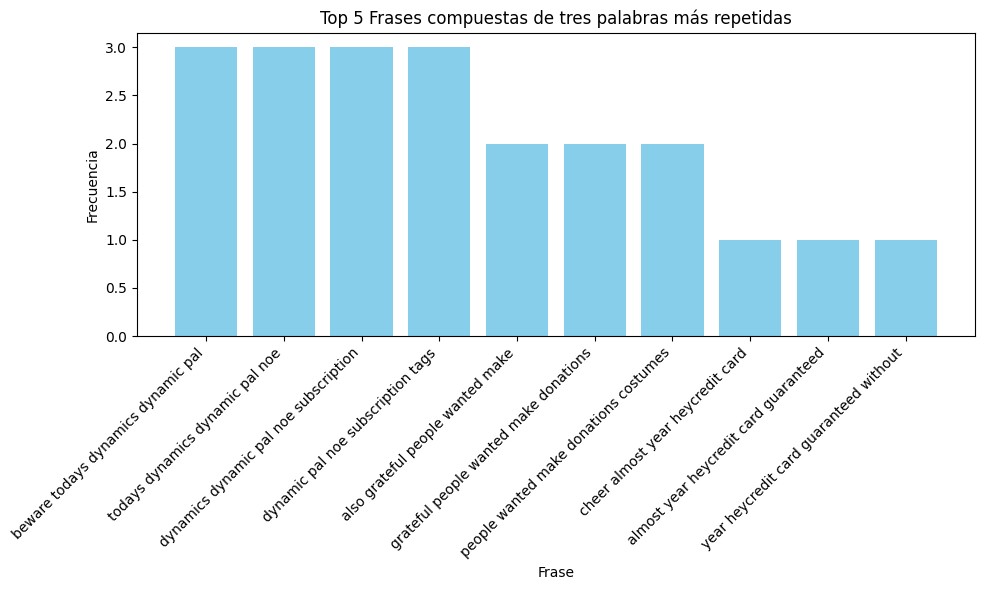

In [4]:
# Frecuencia para frases de 3 palabras, top 10
nltk.download('stopwords')
# Obtener las stopwords en inglés
stop_words = set(stopwords.words('english'))

# Tokenización y eliminación de stopwords
words = ' '.join(df['translated_tweet']).split()  # Tokenización
words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]  # Eliminación de stopwords

# Obtener frases compuestas de tres palabras
three_word_phrases = list(ngrams(words, 5))

# Contar ocurrencias de frases compuestas de tres palabras
phrase_counts = Counter(three_word_phrases)

# Obtener las tres frases más repetidas
top_three_phrases = phrase_counts.most_common(10)

# Convertir a DataFrame para graficar
top_three_phrases_df = pd.DataFrame(top_three_phrases, columns=['Phrase', 'Frequency'])

# Graficar
plt.figure(figsize=(10, 6))
plt.bar(top_three_phrases_df['Phrase'].apply(lambda x: ' '.join(x)), top_three_phrases_df['Frequency'], color='skyblue')
plt.title('Top 5 Frases compuestas de tres palabras más repetidas')
plt.xlabel('Frase')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [5]:

# Preprocesamiento
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
documentos_tokenizados = [" ".join([token for token in nltk.word_tokenize(documento.lower()) if token.isalnum() and token not in stop_words]) for documento in df['translated_tweet']]

# Representación de datos utilizando TF-IDF
vectorizador_tfidf = TfidfVectorizer()
matriz_tfidf = vectorizador_tfidf.fit_transform(documentos_tokenizados)

# Método de la silueta para determinar el número óptimo de clusters
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(matriz_tfidf)
    silhouette_avg = silhouette_score(matriz_tfidf, labels)
    silhouette_scores.append(silhouette_avg)

# Encontrar el número óptimo de clusters
optimal_num_clusters = silhouette_scores.index(max(silhouette_scores)) + 2  # Sumar 2 porque empezamos desde k=2
print("Número óptimo de clusters según el método de la silueta:", optimal_num_clusters)

# Aplicación de K-Means con el número óptimo de clusters
kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=42)
kmeans.fit(matriz_tfidf)

# Clusters obtenidos
centros_clusters = kmeans.cluster_centers_
palabras_claves = vectorizador_tfidf.get_feature_names_out()
for i, centro in enumerate(centros_clusters):
    palabras_clave_cluster = [palabras_claves[j] for j in centro.argsort()[:-10 - 1:-1]] # Cuántas palabras imprime    
    print(f"Cluster {i+1}: {palabras_clave_cluster}")

[nltk_data] Downloading package punkt to C:\Users\Ana Paola
[nltk_data]     A.P\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Ana Paola
[nltk_data]     A.P\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
d:\cosas\python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\cosas\python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\cosas\python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnin

Número óptimo de clusters según el método de la silueta: 8
Cluster 1: ['thank', 'much', 'im', 'response', 'able', 'lol', 'hello', 'issue', 'clarified', 'god']
Cluster 2: ['gracias', 'youre', 'friendly', 'first', 'fixes', 'flag', 'flagrainbow', 'folded', 'follow', 'following']
Cluster 3: ['well', 'could', 'xd', 'truth', 'done', 'excellent', 'bank', 'started', 'anything', 'partying']
Cluster 4: ['ok', 'skin', 'tone', 'heart', 'thanks', 'also', 'appreciate', 'mediumlight', 'resolved', 'hands']
Cluster 5: ['good', 'better', 'need', 'card', 'face', 'thats', 'amazon', 'ready', 'aid', 'list']
Cluster 6: ['great', 'greatly', 'first', 'fixes', 'flag', 'flagrainbow', 'folded', 'follow', 'following', 'fondeadora']
Cluster 7: ['thanks', 'already', 'hahaha', 'answered', 'thank', 'follow', 'reply', 'ha', 'thumbs', 'solved']
Cluster 8: ['dynamic', 'subscription', 'dynamics', 'pal', 'noe', 'tags', 'todays', 'beware', 'first', 'didnt']


d:\cosas\python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\cosas\python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [6]:

# Agrupar los datos por fecha y calcular el promedio del puntaje compuesto de sentimiento para cada fecha
sentimiento_promedio = df['Sentimiento'].apply(lambda x: x[1]).groupby(df['date']).mean()

# Crear una lista de comentarios para cada punto de la línea
comentarios = df['translated_tweet'].tolist()

# Crear la figura de la gráfica interactiva
fig = go.Figure()

# Agregar una línea para mostrar cómo varían los sentimientos con el tiempo
fig.add_trace(go.Scatter(x=sentimiento_promedio.index, y=sentimiento_promedio.values,
                         mode='lines', name='Sentimiento promedio',
                         hovertext=comentarios, hoverinfo='text+x+y'))

# Establecer el diseño del gráfico
fig.update_layout(title='Variación del Sentimiento con el Tiempo',
                  xaxis_title='Fecha',
                  yaxis_title='Puntaje Compuesto de Sentimiento')

# Mostrar la gráfica
fig.show()
